# Part 3: Wine-Tasting Machine.

## Step 3.1: Data Preparation

In [108]:
%matplotlib inline


In [109]:
import pandas as pd
from ydata_profiling import ProfileReport

# Load red wine data
red_wine = pd.read_csv("./red_wine.csv")

# Generate a profile report
profile = ProfileReport(red_wine, title="Red Wine Data Report")
profile.to_file("Red_Wine_Data_Profile.html")

# Display basic information about the dataset
print(red_wine.head())
print(red_wine.info())
print(red_wine.describe())


Export report to file: 100%|██████████| 1/1 [00:00<00:00, 608.40it/s]

   citric acid  sulphates  alcohol  type
0         0.49       0.63      8.0   low
1         0.66       0.57      8.3   low
2         0.23       0.44      8.5  high
3         0.44       0.84      8.6   low
4         0.08       0.50      8.7   low
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   citric acid  571 non-null    float64
 1   sulphates    571 non-null    float64
 2   alcohol      571 non-null    float64
 3   type         571 non-null    object 
dtypes: float64(3), object(1)
memory usage: 18.0+ KB
None
       citric acid   sulphates     alcohol
count   571.000000  571.000000  571.000000
mean      0.324676    0.588161   10.776883
std       0.175103    0.188478    1.092562
min       0.000000    0.250000    8.000000
25%       0.240000    0.450000    9.900000
50%       0.330000    0.570000   10.800000
75%       0.440000    0.710000   11.600

## Step 3.2: Model Training and Evaluation

### Step 3.2.1: Define Models and Perform Cross-Validation

In [110]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score

# Separate features and target
X = red_wine.drop("type", axis=1)
y = (red_wine["type"] == "high").astype(int)  # Convert to binary: 1 = high, 0 = low

# Create and evaluate DummyClassifier
dummy = DummyClassifier(strategy="most_frequent")
baseline_acc = cross_val_score(dummy, X, y, cv=10, scoring="accuracy").mean()
baseline_auc = cross_val_score(dummy, X, y, cv=10, scoring="roc_auc").mean()

print(f"Baseline Accuracy: {baseline_acc:.4f}")
print(f"Baseline AUC: {baseline_auc:.4f}")


Baseline Accuracy: 0.5289
Baseline AUC: 0.5000


In [111]:
# Import Necessary Libraries
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


In [112]:
# Prepare Data for Training
# Define features and target
X = red_wine.drop(columns=['type'])
y = red_wine['type'] 


In [113]:
# Logistic Regression
model_lr = LogisticRegression(max_iter=1000)
lr_accuracy = cross_val_score(model_lr, X, y, cv=10, scoring='accuracy').mean()
lr_auc = cross_val_score(model_lr, X, y, cv=10, scoring='roc_auc').mean()


In [114]:
# Naive Bayes
model_nb = GaussianNB()
nb_accuracy = cross_val_score(model_nb, X, y, cv=10, scoring='accuracy').mean()
nb_auc = cross_val_score(model_nb, X, y, cv=10, scoring='roc_auc').mean()


In [115]:
# Decision Tree
model_dt = DecisionTreeClassifier()
dt_accuracy = cross_val_score(model_dt, X, y, cv=10, scoring='accuracy').mean()
dt_auc = cross_val_score(model_dt, X, y, cv=10, scoring='roc_auc').mean()

In [116]:
# SVM (Linear)
model_svm_linear = SVC(kernel='linear', probability=True)
svm_linear_accuracy = cross_val_score(model_svm_linear, X, y, cv=10, scoring='accuracy').mean()
svm_linear_auc = cross_val_score(model_svm_linear, X, y, cv=10, scoring='roc_auc').mean()


In [117]:
# SVM (RBF)
model_svm_rbf = SVC(kernel='rbf', probability=True)
svm_rbf_accuracy = cross_val_score(model_svm_rbf, X, y, cv=10, scoring='accuracy').mean()
svm_rbf_auc = cross_val_score(model_svm_rbf, X, y, cv=10, scoring='roc_auc').mean()


In [118]:
# Random Forest
model_rf = RandomForestClassifier()
rf_accuracy = cross_val_score(model_rf, X, y, cv=10, scoring='accuracy').mean()
rf_auc = cross_val_score(model_rf, X, y, cv=10, scoring='roc_auc').mean()


#### Print the Results

In [119]:
print(f"Logistic Regression - Accuracy: {lr_accuracy}, AUC: {lr_auc}")
print(f"Naive Bayes - Accuracy: {nb_accuracy}, AUC: {nb_auc}")
print(f"Decision Tree - Accuracy: {dt_accuracy}, AUC: {dt_auc}")
print(f"SVM (Linear) - Accuracy: {svm_linear_accuracy}, AUC: {svm_linear_auc}")
print(f"SVM (RBF) - Accuracy: {svm_rbf_accuracy}, AUC: {svm_rbf_auc}")
print(f"Random Forest - Accuracy: {rf_accuracy}, AUC: {rf_auc}")


Logistic Regression - Accuracy: 0.7847852389594676, AUC: 0.8799019697944429
Naive Bayes - Accuracy: 0.8216273442226255, AUC: 0.8954078975584352
Decision Tree - Accuracy: 0.7444948578342407, AUC: 0.7581035750390589
SVM (Linear) - Accuracy: 0.7918632788868724, AUC: 0.8814885274025059
SVM (RBF) - Accuracy: 0.5358439201451907, AUC: 0.8689201360169102
Random Forest - Accuracy: 0.8005444646098002, AUC: 0.896697760622492


### Step 3.3: Plot the ROC Curve for Random Forest

In [120]:
# Convert 'high' and 'low' labels to binary values
y = y.map({'high': 1, 'low': 0})

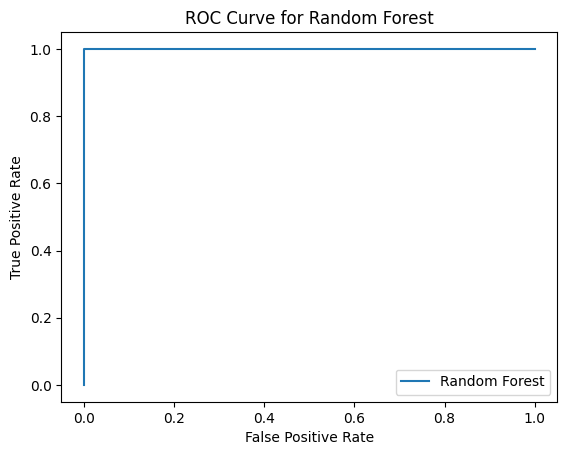

In [121]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Fit Random Forest on the whole dataset
model_rf.fit(X, y)
y_pred_proba = model_rf.predict_proba(X)[:, 1]

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y, y_pred_proba, pos_label=1)
plt.plot(fpr, tpr, label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend()
plt.show()

### Step 3.4: Evaluate on White Wine Data

In [122]:
# Load white wine data
white_wine = pd.read_csv("./white_Wine.csv")
X_white = white_wine.drop(columns=['type']) 
y_white = white_wine['type']  

white_auc = cross_val_score(model_nb, X_white, y_white, cv=10, scoring='roc_auc').mean()
print("AUC on White Wine Data:", white_auc)

AUC on White Wine Data: 0.95
